## Aim

Applying Random Forests for Amazon Reviews Classification

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.

Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews

### 1. Import the Libraries and Dataset

In [280]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [281]:
# import the dataset

df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [282]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [283]:
df.shape

(3150, 5)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [285]:
df.isnull().sum()

#no null values 

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [286]:
pd.value_counts(df.variation).count()

#In the variation feature, there are 16 different values. 

16

In [287]:
pd.value_counts(df.variation)

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [288]:
#converting date variable from object to datetime
df[['date']] = df[['date']].apply(pd.to_datetime)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 123.2+ KB


### 2. Exploring the Data

In [290]:
#checking positive and negative reviews
positive = df[df['feedback'] == 1]
negative = df[df['feedback'] == 0]

<AxesSubplot:>

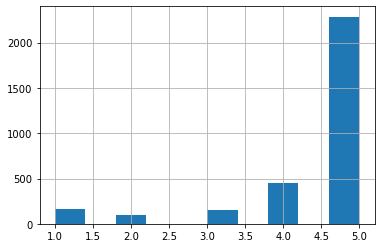

In [291]:
df['rating'].hist()

<AxesSubplot:xlabel='variation', ylabel='rating'>

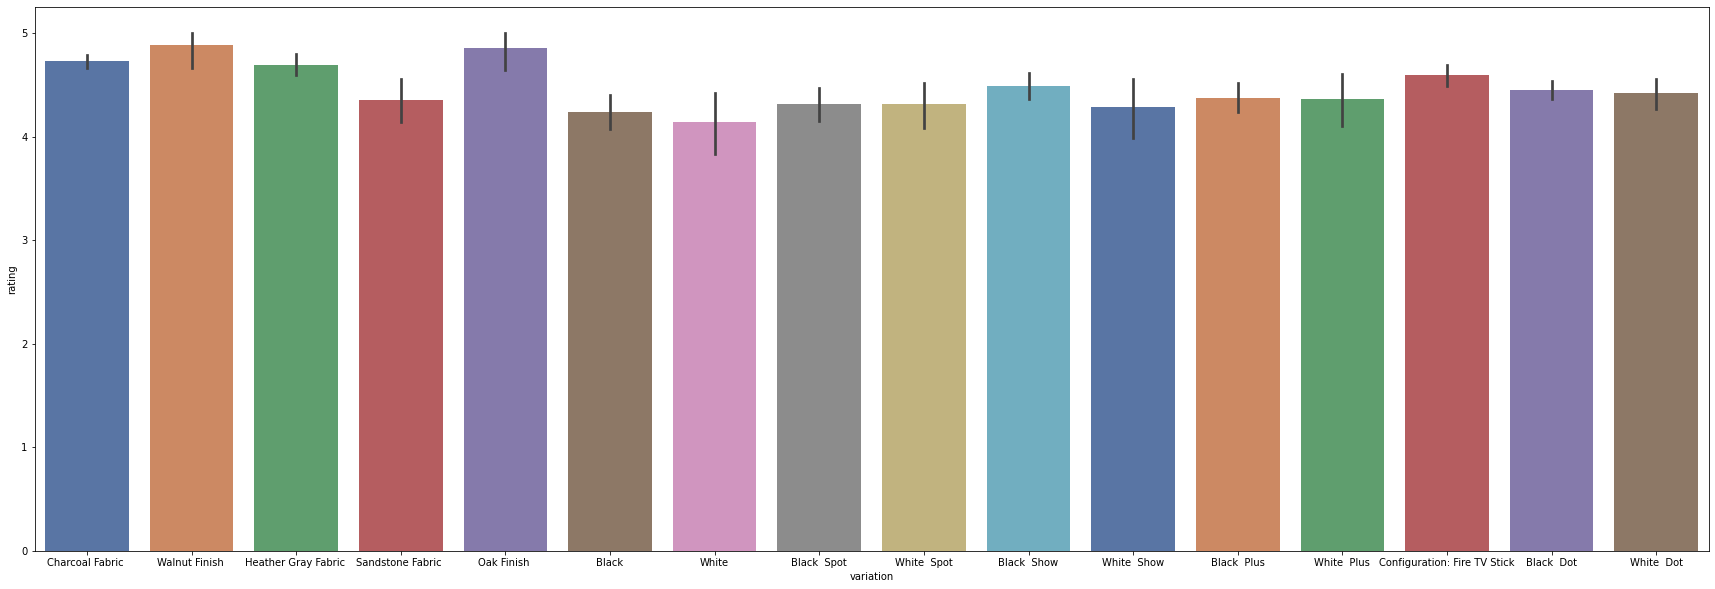

In [292]:
plt.figure(figsize = (30,10))
sns.barplot(x= 'variation', y='rating', data=df, palette='deep')

In [293]:
df.groupby(by='date').sum()

,rating,feedback
date,,
2018-05-16,25,5
2018-05-17,35,7
2018-05-18,14,3
2018-05-19,22,5
2018-05-20,23,5
...,...,...
2018-07-27,152,32
2018-07-28,1137,237
2018-07-29,2209,456


In [294]:
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Week'] = pd.DatetimeIndex(df['date']).week

<ipython-input-294-59678848b85c>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Week'] = pd.DatetimeIndex(df['date']).week


In [295]:
df.tail()

,rating,date,variation,verified_reviews,feedback,Year,Month,Week
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,2018,7,31
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,2018,7,31
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,2018,7,31
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,2018,7,31
3149,4,2018-07-29,Black Dot,Good,1,2018,7,30


<AxesSubplot:>

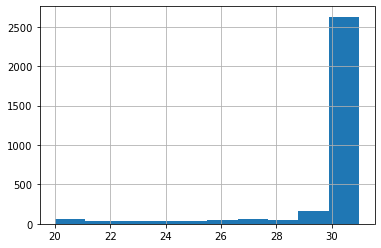

In [296]:
df['Week'].hist()

<AxesSubplot:>

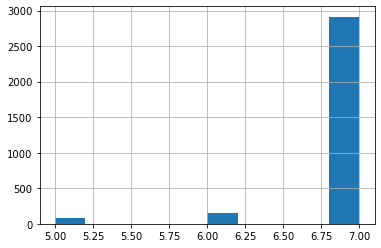

In [297]:
df['Month'].hist()

### 3. Data Cleaning and Feature Engineering

In [298]:
#will start by dropping the date and date related features, as these features do not provide a lot of variability to the model.

df= df.drop(['date', 'Year', 'Month', 'Week'],axis=1)

In [299]:
df.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [300]:
#creating dummy variable fromn variation for the dataset.
#variation contains different values that might be beneficial for the model

variation_dummy = pd.get_dummies(df['variation'], drop_first=True)
variation_dummy

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [301]:
df.drop(['variation'], axis=1, inplace=True)

In [302]:
df = pd.concat([df, variation_dummy], axis=1)

In [303]:
df.head()

,rating,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### 4. Feature Engineering for Text Variable

CountVectorizer is a great tool provided by the scikit-learn library in Python. 
It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [304]:
from sklearn.feature_extraction.text import CountVectorizer

In [305]:
vectorizer = CountVectorizer()
alexa_cv = vectorizer.fit_transform(df['verified_reviews'])

In [306]:
alexa_cv.shape

(3150, 4044)

In [307]:
alexa_cv

<3150x4044 sparse matrix of type '<class 'numpy.int64'>'
	with 60852 stored elements in Compressed Sparse Row format>

In [308]:
type(alexa_cv)

scipy.sparse.csr.csr_matrix

In [309]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [310]:
print(alexa_cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [311]:
#dropping verified_reviews and replace them with alexa_cv 

df.drop(['verified_reviews'], axis=1, inplace=True)

In [312]:
df.head()

,rating,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [313]:
#turning the array into a dataframe before comnbining with the main data
encoded_reviews = pd.DataFrame(alexa_cv.toarray())

In [314]:
df = pd.concat([df, encoded_reviews], axis=1)

In [315]:
df.head()

,rating,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [316]:
# we have so many columns for feedback now

### 5. Creating Training and Test Datasets

In [317]:
X = df.drop(['feedback'], axis=1)
X.shape

(3150, 4060)

In [318]:
y = df['feedback']
y.shape

(3150,)

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=5)

### 6. Model Fitting

In [320]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 90, criterion = 'entropy', random_state = 0)
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=90, random_state=0)

In [321]:
y_predict_train = randomforest_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)

<AxesSubplot:>

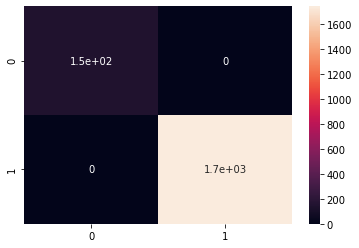

In [322]:
sns.heatmap(cm, annot=True)

In [323]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00      1743

    accuracy                           1.00      1890
   macro avg       1.00      1.00      1.00      1890
weighted avg       1.00      1.00      1.00      1890



In [324]:
y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

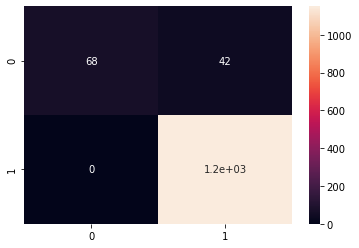

In [325]:
sns.heatmap(cm, annot=True)

In [326]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76       110
           1       0.96      1.00      0.98      1150

    accuracy                           0.97      1260
   macro avg       0.98      0.81      0.87      1260
weighted avg       0.97      0.97      0.96      1260



#### Result

This is a overfitting model. In order to find a better model we need to try the things below. 

- Feature Selection
- Dimension reduction (PCA)
- Try different models like XGBoost, SVM or Gradient Boosted Trees
- Play with hyperparameters